In [7]:
#pip install factor_analyzer pandas

In [8]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Load your combined dataset
combined_df = pd.read_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/combined_speech_demographic_info.csv', sep =";")
# Extract the numeric part of the 'bids_number' and store it in a new column 'bidsvalue'
combined_df['bidsvalue'] = combined_df['bids_number'].str.extract('(\d+)').astype(int)
combined_df=combined_df.drop(["participant_id", "bids_number"], axis = 1)
combined_df = combined_df[ ['bidsvalue'] + [ col for col in combined_df.columns if col != 'Mid' ] ]
combined_df

,bidsvalue,bids_number,participant_id,average_mfccs_1_neg,average_mfccs_2_neg,average_mfccs_3_neg,average_mfccs_4_neg,alpha_ratio_mean_neg,alpha_ratio_sd_neg,apq11_shimmer_neg,...,CERQ_Selbstbeschuldigung,CERQ_Akzeptanz,CERQ_Rumination,CERQ_Positive Refokussierung,CERQ_Refokussierung auf Planung,CERQ_Positive Neubewertung,CERQ_Relativieren,CERQ_Katastrophisierung,CERQ_Andere Beschuldigen,bidsvalue
0,58,Sub-058,277,82.379395,20.768499,19.860287,8.051362,7.284629,6.096077,11.421412,...,18,9,10,4,7,5,4,13,5,58
1,35,Sub-035,234,91.421997,32.314178,19.888418,9.289201,10.718941,7.867776,18.531850,...,12,16,17,4,8,8,12,8,5,35
2,34,Sub-034,235,70.376846,13.177592,12.432057,1.496185,7.619763,7.617054,9.548101,...,9,16,14,12,16,16,18,4,6,34
3,108,Sub-108,348,97.495644,11.368194,25.960098,13.172879,7.972128,7.190350,15.057472,...,11,11,10,7,14,10,14,5,7,108
4,46,Sub-046,260,80.037323,21.050978,8.607089,5.815983,12.940309,12.775001,10.540608,...,6,17,14,8,10,9,13,7,16,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,96,Sub-096,327,100.946335,4.733990,22.608526,9.605459,6.579741,4.924329,15.718046,...,5,15,18,12,20,13,18,8,19,96
90,131,Sub-131,377,97.712914,20.029383,31.282303,3.232759,9.392916,7.128253,12.255668,...,17,13,8,9,12,12,15,7,10,131
91,114,Sub-114,354,114.757248,15.659719,29.810190,12.334111,10.178854,6.710355,19.113003,...,16,16,15,10,14,6,7,9,9,114
92,49,Sub-049,251,96.064865,20.491119,13.465354,17.949970,8.608132,6.375060,14.756413,...,13,8,12,4,10,10,12,6,7,49


In [40]:
# Select only the speech features columns for factor analysis
speech_features = combined_df.iloc[:, 3:239]
# Convert all columns to numeric, forcing errors to NaN
speech_features = speech_features.apply(pd.to_numeric, errors='coerce')
speech_features

,average_mfccs_1_neg,average_mfccs_2_neg,average_mfccs_3_neg,average_mfccs_4_neg,alpha_ratio_mean_neg,alpha_ratio_sd_neg,apq11_shimmer_neg,apq3_shimmer_neg,apq5_shimmer_neg,dda_shimmer_neg,...,pronoun_rate_pos,proper_noun_rate_pos,proportion_verb_phrase_with_objects_pos,proportion_verb_phrase_with_subjects_pos,type_token_ratio_pos,verb_phrase_with_aux_and_vp_rate_pos,verb_phrase_with_aux_rate_pos,verb_rate_pos,word_count_pos,word_frequency_mean_pos
0,82.379395,20.768499,19.860287,8.051362,7.284629,6.096077,11.421412,5.298905,7.391673,15.896714,...,0.135135,0.027027,0.111111,0.777778,0.864865,0.333333,1.000000,0.081081,32,4.750000
1,91.421997,32.314178,19.888418,9.289201,10.718941,7.867776,18.531850,8.018380,10.886191,24.055140,...,0.151515,0.000000,0.242424,0.727273,0.479592,0.000000,0.526316,0.095960,161,4.747556
2,70.376846,13.177592,12.432057,1.496185,7.619763,7.617054,9.548101,5.130727,6.164726,15.392180,...,0.050505,0.020202,0.166667,0.750000,0.666667,0.000000,0.250000,0.080808,80,5.047419
3,97.495644,11.368194,25.960098,13.172879,7.972128,7.190350,15.057472,6.300391,8.975165,18.901173,...,0.117647,0.011765,0.440000,0.720000,0.620482,0.000000,0.400000,0.088235,145,4.746415
4,80.037323,21.050978,8.607089,5.815983,12.940309,12.775001,10.540608,4.699568,5.837134,14.098704,...,0.047619,0.000000,1.000000,1.000000,0.809524,0.000000,0.000000,0.095238,19,5.073333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,100.946335,4.733990,22.608526,9.605459,6.579741,4.924329,15.718046,5.776804,7.754120,17.330411,...,0.117647,0.000000,0.300000,0.600000,0.780000,0.000000,1.250000,0.078431,43,5.030000
90,97.712914,20.029383,31.282303,3.232759,9.392916,7.128253,12.255668,6.100525,8.225302,18.301576,...,0.037037,0.000000,0.333333,0.666667,0.851852,0.000000,1.000000,0.037037,24,4.178889
91,114.757248,15.659719,29.810190,12.334111,10.178854,6.710355,19.113003,9.024963,12.607795,27.074890,...,0.115385,0.000000,0.333333,0.500000,0.846154,0.250000,0.500000,0.153846,23,5.073000
92,96.064865,20.491119,13.465354,17.949970,8.608132,6.375060,14.756413,7.586481,9.047230,22.759444,...,0.112903,0.064516,0.142857,1.000000,0.661290,0.000000,0.000000,0.048387,50,4.751176


Factor Loadings:
 [[-0.17752035 -0.63852485 -0.16155894 -0.49692629  0.21171454]
 [-0.03198955 -0.53658251  0.15787503  0.53161966 -0.08112272]
 [-0.37326232 -0.42235192  0.38257867 -0.13772963  0.04223572]
 ...
 [ 0.07485249 -0.08971883 -0.08072584  0.01261407  0.27336645]
 [ 0.02906947  0.01991676  0.07362328 -0.17463321  0.82283836]
 [ 0.05257697 -0.11436002  0.02492577  0.10786142  0.0776526 ]]


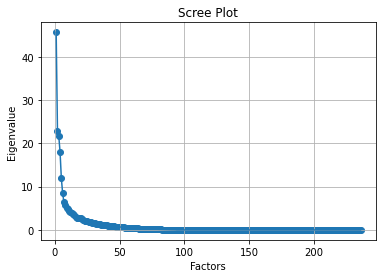

Factor Variance:
 (array([33.35512999, 31.5247434 , 18.33613771, 17.77968237, 17.33665007]), array([0.1413353 , 0.13357942, 0.0776955 , 0.07533764, 0.07346038]), array([0.1413353 , 0.27491472, 0.35261022, 0.42794785, 0.50140824]))


In [41]:
# Perform factor analysis
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(speech_features)

# Get factor loadings
loadings = fa.loadings_

# Print the factor loadings
print("Factor Loadings:\n", loadings)

# Plot the scree plot to determine the number of factors
ev, v = fa.get_eigenvalues()
plt.scatter(range(1, speech_features.shape[1] + 1), ev)
plt.plot(range(1, speech_features.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# If needed, extract the factor variance
variance = fa.get_factor_variance()
print("Factor Variance:\n", variance)
